# Werewolf Among Us - Human Players Dataset EDA

Exploratory data analysis, data loading and transforming


In [183]:
import ast
import os
import json
import datetime
import time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from itertools import chain


## Load and format data

In [145]:
basepath = os.path.normpath("../Data/Werewolf-Among-Us")
out_path = os.path.normpath("../Data/Output/EDA_WAU/")

# Load annotated utterances from Ego4D and YouTube
split_paths = [os.path.join(basepath, x) for x in [
    "Ego4D/split/train.json",
    "Ego4D/split/val.json",
    "Ego4D/split/test.json",
    "Youtube/split/train.json",
    "Youtube/split/val.json",
    "Youtube/split/test.json"
]]

utterances = []
game_rounds = []
for path in split_paths:
    if os.path.exists(path):
        with open(path, "r", encoding="utf-8") as f:
            games = json.load(f)
            for game in games:
                for utt in game["Dialogue"]:
                    utt["Game_ID"] = game["Game_ID"]
                    utt["YT_ID"] = game.get("YT_ID", "")
                    utt["EG_ID"] = game.get("EG_ID", "")
                    utt["video_name"] = game.get("video_name", "")
                    utt["split"] = os.path.basename(path).replace(".json", "")
                    utt["source"] = "Ego4D" if "Ego4D" in path else "Youtube"
                    utterances.append(utt)
                    game_rounds.append(game)

df = pd.DataFrame(utterances)
df['utterance_length'] = df['utterance'].str.split().apply(len)
df['annotation'] = df['annotation'].apply(lambda x: x if isinstance(x, list) else [])
df['speaker'] = df['speaker'].str.strip().str.lower()
df['Game_ID'] = df['Game_ID'].str.strip().str.lower()
df['source'] = df['source'].str.strip()
df
# df.to_csv('df.csv', index=False) 

,Rec_Id,speaker,timestamp,utterance,annotation,Game_ID,YT_ID,EG_ID,video_name,split,source,utterance_length
0,1,jessica,02:46,What?,[Interrogation],game4,,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,,train,Ego4D,1
1,2,kaelan,02:48,Okay. I'm the Seer and I know the Werewolf's r...,"[Identity Declaration, Accusation, Defense]",game4,,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,,train,Ego4D,11
2,3,kevin,02:49,"A pretty bold, immediate claim.",[Accusation],game4,,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,,train,Ego4D,5
3,4,kaelan,02:55,"Well, okay, I started as the Seer and I saw th...","[Identity Declaration, Defense, Evidence]",game4,,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,,train,Ego4D,14
4,5,danieal,03:02,I was the Robber.,[Identity Declaration],game4,,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,,train,Ego4D,4
...,...,...,...,...,...,...,...,...,...,...,...,...
24065,135,caitlynn,05:42,"Yeah. Cool, cool, cool.",[No Strategy],game3,part11,,ONE NIGHT ULTIMATE WEREWOLF 55 January 26th 2019,test,Youtube,4
24066,136,mitchell,05:44,Gotcha.,[No Strategy],game3,part11,,ONE NIGHT ULTIMATE WEREWOLF 55 January 26th 2019,test,Youtube,1
24067,137,caitlynn,05:44,Should we vote?,[Call for Action],game3,part11,,ONE NIGHT ULTIMATE WEREWOLF 55 January 26th 2019,test,Youtube,3
24068,138,mitchell,05:45,"Okay, yeah fuck.",[No Strategy],game3,part11,,ONE NIGHT ULTIMATE WEREWOLF 55 January 26th 2019,test,Youtube,3


In [146]:
## Reformat ID'ing keys to standardize
df = df.rename(columns={"Game_ID": "GAME_ID_old"})
df["Game_ID"] = df["GAME_ID_old"] + " - " + df["EG_ID"] + df["video_name"].str.strip()
df = df.drop(columns=["YT_ID", "EG_ID", "video_name", "split", "GAME_ID_old"], errors="ignore")
df

,Rec_Id,speaker,timestamp,utterance,annotation,source,utterance_length,Game_ID
0,1,jessica,02:46,What?,[Interrogation],Ego4D,1,game4 - 3ba069be-60fa-47fc-bd7b-f85bf649a5bd
1,2,kaelan,02:48,Okay. I'm the Seer and I know the Werewolf's r...,"[Identity Declaration, Accusation, Defense]",Ego4D,11,game4 - 3ba069be-60fa-47fc-bd7b-f85bf649a5bd
2,3,kevin,02:49,"A pretty bold, immediate claim.",[Accusation],Ego4D,5,game4 - 3ba069be-60fa-47fc-bd7b-f85bf649a5bd
3,4,kaelan,02:55,"Well, okay, I started as the Seer and I saw th...","[Identity Declaration, Defense, Evidence]",Ego4D,14,game4 - 3ba069be-60fa-47fc-bd7b-f85bf649a5bd
4,5,danieal,03:02,I was the Robber.,[Identity Declaration],Ego4D,4,game4 - 3ba069be-60fa-47fc-bd7b-f85bf649a5bd
...,...,...,...,...,...,...,...,...
24065,135,caitlynn,05:42,"Yeah. Cool, cool, cool.",[No Strategy],Youtube,4,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...
24066,136,mitchell,05:44,Gotcha.,[No Strategy],Youtube,1,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...
24067,137,caitlynn,05:44,Should we vote?,[Call for Action],Youtube,3,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...
24068,138,mitchell,05:45,"Okay, yeah fuck.",[No Strategy],Youtube,3,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...


In [147]:
rounds_df =  pd.DataFrame(game_rounds).drop(columns="Dialogue")
rounds_df

,EG_ID,Game_ID,playerNames,votingOutcome,startRoles,endRoles,warning,YT_ID,video_name,startTime,endTime
0,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,Game4,"[Danieal, Jessica, Kevin, Kaelan]","[NA, NA, NA, NA]","[Minion, Robber, Troublemaker, Seer]","[Robber, Seer, Troublemaker, Minion]",All players voted middle,NaN,NaN,NaN,NaN
1,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,Game4,"[Danieal, Jessica, Kevin, Kaelan]","[NA, NA, NA, NA]","[Minion, Robber, Troublemaker, Seer]","[Robber, Seer, Troublemaker, Minion]",All players voted middle,NaN,NaN,NaN,NaN
2,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,Game4,"[Danieal, Jessica, Kevin, Kaelan]","[NA, NA, NA, NA]","[Minion, Robber, Troublemaker, Seer]","[Robber, Seer, Troublemaker, Minion]",All players voted middle,NaN,NaN,NaN,NaN
3,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,Game4,"[Danieal, Jessica, Kevin, Kaelan]","[NA, NA, NA, NA]","[Minion, Robber, Troublemaker, Seer]","[Robber, Seer, Troublemaker, Minion]",All players voted middle,NaN,NaN,NaN,NaN
4,3ba069be-60fa-47fc-bd7b-f85bf649a5bd,Game4,"[Danieal, Jessica, Kevin, Kaelan]","[NA, NA, NA, NA]","[Minion, Robber, Troublemaker, Seer]","[Robber, Seer, Troublemaker, Minion]",All players voted middle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24065,NaN,Game3,"[Justin, Caitlynn, Mitchell, Brad, Mike]","[2, 2, 0, 2, 0]","[Werewolf, Werewolf, Insomniac, Tanner, Seer]","[Werewolf, Werewolf, Insomniac, Tanner, Seer]",N/A,part11,ONE NIGHT ULTIMATE WEREWOLF 55 January 26th 2019,00:17:22,00:23:11
24066,NaN,Game3,"[Justin, Caitlynn, Mitchell, Brad, Mike]","[2, 2, 0, 2, 0]","[Werewolf, Werewolf, Insomniac, Tanner, Seer]","[Werewolf, Werewolf, Insomniac, Tanner, Seer]",N/A,part11,ONE NIGHT ULTIMATE WEREWOLF 55 January 26th 2019,00:17:22,00:23:11
24067,NaN,Game3,"[Justin, Caitlynn, Mitchell, Brad, Mike]","[2, 2, 0, 2, 0]","[Werewolf, Werewolf, Insomniac, Tanner, Seer]","[Werewolf, Werewolf, Insomniac, Tanner, Seer]",N/A,part11,ONE NIGHT ULTIMATE WEREWOLF 55 January 26th 2019,00:17:22,00:23:11
24068,NaN,Game3,"[Justin, Caitlynn, Mitchell, Brad, Mike]","[2, 2, 0, 2, 0]","[Werewolf, Werewolf, Insomniac, Tanner, Seer]","[Werewolf, Werewolf, Insomniac, Tanner, Seer]",N/A,part11,ONE NIGHT ULTIMATE WEREWOLF 55 January 26th 2019,00:17:22,00:23:11


In [148]:
# Load all outcome data from previously extracted folders
outcome_paths = [os.path.join(basepath, x) for x in [
    "Ego4D/vote_outcome_ego4d",
    "Youtube/vote_outcome_youtube_released"
]]

outcomes = []
for path in outcome_paths:
    src = "Ego4D" if "ego4d" in path.lower() else "Youtube"
    for filename in os.listdir(path):
        if filename.endswith(".json"):
            with open(os.path.join(path, filename), "r", encoding="utf-8") as f:
                content = json.load(f)
                for game_id, game in content.items():
                    players = game.get("playerNames", [])
                    votes = game.get("votingOutcome", [])
                    start_roles = game.get("startRoles", [])
                    end_roles = game.get("endRoles", [])

                    # If no werewolf character, skip this game
                    if not "Werewolf" in start_roles:
                        continue
                    
                    for i, name in enumerate(players):
                        vote_idx = votes[i] if i < len(votes) and votes[i] != "NA" else None
                        voted_for = players[vote_idx].strip().lower() if isinstance(vote_idx, int) and vote_idx < len(players) else None
                        outcomes.append({
                            "Game_ID": f"{game_id.strip().lower()} - {filename.strip('.json')}",
                            "speaker": name.strip().lower(),
                            "source": src,
                            "voted_for": voted_for,
                            "voted_index": vote_idx,
                            "start_role": start_roles[i] if i < len(start_roles) else None,
                            "end_role": end_roles[i] if i < len(end_roles) else None
                        })

outcome_df = pd.DataFrame(outcomes)
# outcome_df.to_csv('outcome_df.csv', index=False) 
outcome_df

,Game_ID,speaker,source,voted_for,voted_index,start_role,end_role
0,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,jessica,2,Seer,Seer
1,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kaelan,Ego4D,jessica,2,Drunk,Center card
2,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,jessica,Ego4D,None,None,Werewolf,Werewolf
3,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,daniel,Ego4D,daniel,3,Werewolf,Werewolf
4,game9 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,None,None,Troublemaker,Troublemaker
...,...,...,...,...,...,...,...
739,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,justin,Youtube,eric,1,Werewolf,Werewolf
740,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,eric,Youtube,mitchell,3,Werewolf,Tanner
741,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,paul,Youtube,mitchell,3,Villager,Villager
742,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,mitchell,Youtube,eric,1,Troublemaker,Troublemaker


In [149]:
# Make outcome_df have game outcomes and survival

outcome_df = outcome_df.drop(columns=["voted_index", "start_role"], errors="ignore")

def determine_outcome(group):
    # Drop NaN or None values in voted_for
    votes = group['voted_for'].dropna()

    # Count the votes
    vote_counts = votes.value_counts()

    if len(vote_counts) == 0:
        return "None", "Werewolves"

    # Check for tie: if top two have same number of votes, no consensus
    if len(vote_counts) > 1 and vote_counts.iloc[0] == vote_counts.iloc[1]:
        return "None", "Werewolves"

    # Most voted person
    most_voted = vote_counts.idxmax()

    # Check if that person is a werewolf
    target = group[(group['speaker'] == most_voted)]
    # target = group[(group['speaker'] == most_voted) & (group['end_role'] == 'Werewolf')]

    # print(target, "\n\nHERE\n\n")
    
    if target["end_role"].iloc[0] == "Werewolf":
        return target["speaker"].iloc[0], "Villagers"
    else:
        return target["speaker"].iloc[0], "Werewolves"

# Apply the function group-wise
outcomes = outcome_df.groupby(['Game_ID', 'source'], group_keys=False).apply(determine_outcome)
outcome_df[['votes_target', 'winner']] = outcome_df.set_index(['Game_ID', 'source']).index.map(outcomes).tolist()

outcome_df.to_csv(os.path.join(out_path, "allrounds.csv"))

outcome_df



,Game_ID,speaker,source,voted_for,end_role,votes_target,winner
0,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,jessica,Seer,jessica,Villagers
1,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kaelan,Ego4D,jessica,Center card,jessica,Villagers
2,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,jessica,Ego4D,None,Werewolf,jessica,Villagers
3,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,daniel,Ego4D,daniel,Werewolf,jessica,Villagers
4,game9 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,None,Troublemaker,None,Werewolves
...,...,...,...,...,...,...,...
739,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,justin,Youtube,eric,Werewolf,eric,Werewolves
740,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,eric,Youtube,mitchell,Tanner,eric,Werewolves
741,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,paul,Youtube,mitchell,Villager,eric,Werewolves
742,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,mitchell,Youtube,eric,Troublemaker,eric,Werewolves


In [154]:

# Merge using stricter keys
merged_df = df.merge(outcome_df, on=["Game_ID", "speaker", "source"], how="inner")

# # Add survival column
# merged_df['survived'] = merged_df['start_role'] == merged_df['end_role']
# merged_df.head()
# merged_df.to_csv('merged_df.csv', index=False) 

print(merged_df.describe(), merged_df.info())

merged_df.to_csv(out_path + '/alltext.csv', index=False) 

merged_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rec_Id            21072 non-null  int64 
 1   speaker           21072 non-null  object
 2   timestamp         21072 non-null  object
 3   utterance         21072 non-null  object
 4   annotation        21072 non-null  object
 5   source            21072 non-null  object
 6   utterance_length  21072 non-null  int64 
 7   Game_ID           21072 non-null  object
 8   voted_for         20568 non-null  object
 9   end_role          21072 non-null  object
 10  votes_target      21072 non-null  object
 11  winner            21072 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.9+ MB
             Rec_Id  utterance_length
count  21072.000000      21072.000000
mean      83.707337          7.077639
std       59.679532          6.988105
min        1.000000          1.000000
25%   

,Rec_Id,speaker,timestamp,utterance,annotation,source,utterance_length,Game_ID,voted_for,end_role,votes_target,winner
0,1,kaelan,00:54,I don't know why this is necessary considering...,[No Strategy],Ego4D,11,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
1,3,kaelan,01:05,I am a Villager.,[Identity Declaration],Ego4D,4,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
2,8,kaelan,01:25,"Like, I mean-",[No Strategy],Ego4D,3,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
3,11,kaelan,01:41,"But, I-I-I-I-",[No Strategy],Ego4D,2,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
4,13,kaelan,00:00,"Continue. Well, I guess we don't really need t...",[No Strategy],Ego4D,11,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
...,...,...,...,...,...,...,...,...,...,...,...,...
21067,85,brad,04:39,We could.,[Defense],Youtube,2,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
21068,89,brad,04:43,Justin,[Accusation],Youtube,1,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
21069,100,brad,04:55,"It's just Justin, Justin, Justin.",[Accusation],Youtube,5,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
21070,102,brad,04:57,Just inception.,[No Strategy],Youtube,2,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves


In [158]:

# Explode annotation for per-strategy view
exploded_df = merged_df.explode("annotation")
exploded_df = exploded_df.drop_duplicates(subset=["utterance", "annotation", "Game_ID", "speaker"])
exploded_df = exploded_df[exploded_df['annotation'].notna()]
exploded_df.to_csv(out_path + '/exploded_df.csv', index=False) 

exploded_df.head()


,Rec_Id,speaker,timestamp,utterance,annotation,source,utterance_length,Game_ID,voted_for,end_role,votes_target,winner
0,1,kaelan,00:54,I don't know why this is necessary considering...,No Strategy,Ego4D,11,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
1,3,kaelan,01:05,I am a Villager.,Identity Declaration,Ego4D,4,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
2,8,kaelan,01:25,"Like, I mean-",No Strategy,Ego4D,3,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
3,11,kaelan,01:41,"But, I-I-I-I-",No Strategy,Ego4D,2,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
4,13,kaelan,00:00,"Continue. Well, I guess we don't really need t...",No Strategy,Ego4D,11,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves


In [174]:
# Load the full exploded_df again
# exploded_df = pd.read_csv(out_path + "/exploded_df.csv")
# exploded_df = merged_df

# Clean annotations
# exploded_df["annotation"] = exploded_df["annotation"].apply(lambda x: ast.parse(str(x)))
exploded_df["is_strategic"] = exploded_df["annotation"] != "No Strategy"

# Convert timestamps to minutes
def timestamp_to_min(ts):
    try:
        minutes, seconds = map(int, str(ts).split(":"))
        return minutes + seconds / 60
    except:
        return None

exploded_df["time_min"] = exploded_df["timestamp"].apply(timestamp_to_min)

# Compute general utterance stats
total_utterances = exploded_df[["Game_ID", "Rec_Id"]].drop_duplicates().shape[0]
strategic_utterances = exploded_df[exploded_df["is_strategic"]][["Game_ID", "Rec_Id"]].drop_duplicates().shape[0]
percent_strategic = (strategic_utterances / total_utterances) * 100
avg_utterance_length = exploded_df[["Game_ID", "Rec_Id", "utterance_length"]].drop_duplicates()["utterance_length"].mean()
utterance_length_std = exploded_df[["Game_ID", "Rec_Id", "utterance_length"]].drop_duplicates()["utterance_length"].std()
max_utterance_length = exploded_df["utterance_length"].max()

# Strategy stats
unique_strategies = exploded_df["annotation"].nunique()
top_strategies = exploded_df["annotation"].value_counts()

# Speaker stats
speaker_counts = exploded_df["speaker"].value_counts()
most_talkative = speaker_counts.idxmax()
utterances_per_speaker = speaker_counts.mean()

# Role and survival
exploded_df["survived"] = exploded_df["speaker"] != exploded_df["votes_target"]
survival_rate = exploded_df[["Game_ID", "speaker", "survived"]].drop_duplicates()["survived"].mean()

# Avg strategy count per utterance (counting per unique utterance)
strategy_per_utt = exploded_df[exploded_df["is_strategic"]].groupby(["Game_ID", "Rec_Id"]).size().mean()

# Anomaly checks — long utterances and strategy-only/no-strategy utterances
anomalously_long_utterances = exploded_df[exploded_df["utterance_length"] > 40][["speaker", "utterance", "utterance_length"]]


# Recalculate average number of unique strategies per utterance (corrected method)
corrected_strategy_per_utt = (
    exploded_df[exploded_df["annotation"] != "No Strategy"]
    .groupby(["Game_ID", "Rec_Id"])["annotation"]
    .apply(lambda x: len(set(x)))
    .mean()
)


# Strategy burst detection — utterances with more than 3 strategies
multi_strategy_utterances = (
    exploded_df.groupby(["Game_ID", "Rec_Id"])["annotation"]
    .apply(lambda x: len(set(x)) > 3)
    .sum()
)

# Timing — approximate game durations
game_durations = exploded_df.groupby("Game_ID")["time_min"].max()
avg_game_duration = game_durations.mean()
max_game_duration = game_durations.max()




# Rebuild the overview with corrected value
overview = {
    "total_utterances": total_utterances,
    "strategic_utterances": strategic_utterances,
    "percent_strategic": round(percent_strategic, 2),
    "avg_utterance_length": round(avg_utterance_length, 2),
    "utterance_length_std": round(utterance_length_std, 2),
    "max_utterance_length": max_utterance_length,
    "unique_strategies": unique_strategies,
    "top_5_strategies": top_strategies.to_dict(),
    "unique_speakers": len(speaker_counts),
    "most_talkative_speaker": most_talkative,
    "avg_utterances_per_speaker": round(utterances_per_speaker, 2),
    "survival_rate": round(survival_rate * 100, 2),
    "avg_strategies_per_utterance": round(corrected_strategy_per_utt, 2),
    "long_utterance_examples": anomalously_long_utterances.head(3).to_dict(orient="records"),
    "utterances_with_many_strategies": multi_strategy_utterances,
    "avg_game_duration_min": round(avg_game_duration, 2),
    "max_game_duration_min": round(max_game_duration, 2)
}

overview


{'total_utterances': 20383,
 'strategic_utterances': 11498,
 'percent_strategic': 56.41,
 'avg_utterance_length': 7.25,
 'utterance_length_std': 7.03,
 'max_utterance_length': 310,
 'unique_strategies': 7,
 'top_5_strategies': {'No Strategy': 8885,
  'Interrogation': 3564,
  'Accusation': 3114,
  'Defense': 2823,
  'Evidence': 1937,
  'Call for Action': 1196,
  'Identity Declaration': 1132},
 'unique_speakers': 55,
 'most_talkative_speaker': 'justin',
 'avg_utterances_per_speaker': 411.84,
 'survival_rate': 82.63,
 'avg_strategies_per_utterance': 1.2,
 'long_utterance_examples': [{'speaker': 'margaret',
   'utterance': "So the question is, if he really was the Seer but he is not willing to say any other cards or claim anything else, so that makes me think he's a liar and not the seer. He was for sure the werewolf and I traded him and you are now that.",
   'utterance_length': 51},
  {'speaker': 'margaret',
   'utterance': "Well, but no. He's Troublemaker, no- If he is Troublemaker, she

## 🧾 Dataset Overview – Werewolf Persuasion Games

#### Utterance and Strategy Statistics

- **Total utterances**: 20,383  
- **Strategic utterances**: 11,498  
- **Percent strategic**: 56.41%  
- **Average utterance length**: 7.25  
- **Utterance length standard deviation**: 7.03  
- **Maximum utterance length**: 310  

---

#### Strategy Breakdown

- **Unique strategies**: 7  
- **Top 5 strategies**:
  - *No Strategy*: 8,885  
  - *Interrogation*: 3,564  
  - *Accusation*: 3,114  
  - *Defense*: 2,823  
  - *Evidence*: 1,937  

---

#### Speaker Stats

- **Unique speakers**: 55  
- **Most talkative speaker**: *justin*  
- **Average utterances per speaker**: 411.84  

---

#### Game Outcomes

- **Survival rate**: 82.63%  
- **Average strategies per utterance**: 1.2  
- **Utterances with many strategies**: 7  

---

#### Game Duration

- **Average game duration (minutes)**: 5.79  
- **Max game duration (minutes)**: 17.75  

---

#### Long Utterance Examples

1. **margaret** *(51 words)*  
   > *"So the question is, if he really was the Seer but he is not willing to say any other cards or claim anything else, so that makes me think he's a liar and not the seer. He was for sure the werewolf and I traded him and you are now that."*

2. **margaret** *(52 words)*  
   > *"Well, but no. He's Troublemaker, no- If he is Troublemaker, she would know if she was a Robber or not. So if he was the Troublemaker and she's not looking at this being the Robber, then that's really true. Or y'all are both in it, on it and y'all are both Werewolves."*

3. **hunter** *(77 words)*  
   > *"I caught it. So I grabbed Jacob's and I put it over. Moved it to Zack's side. Yours probably wasn't in the same spot, because I did a poor job of placing yours. And I tried and grabbed yours and I missed yours and I whacked corner pile. So I had to take another trip around. Like, you know, I was doing the circles. And, so I grabbed yours again and then I put it right there."*

---

Let me know if you'd like a version in LaTeX, HTML, or a CSV summary!

## EDA

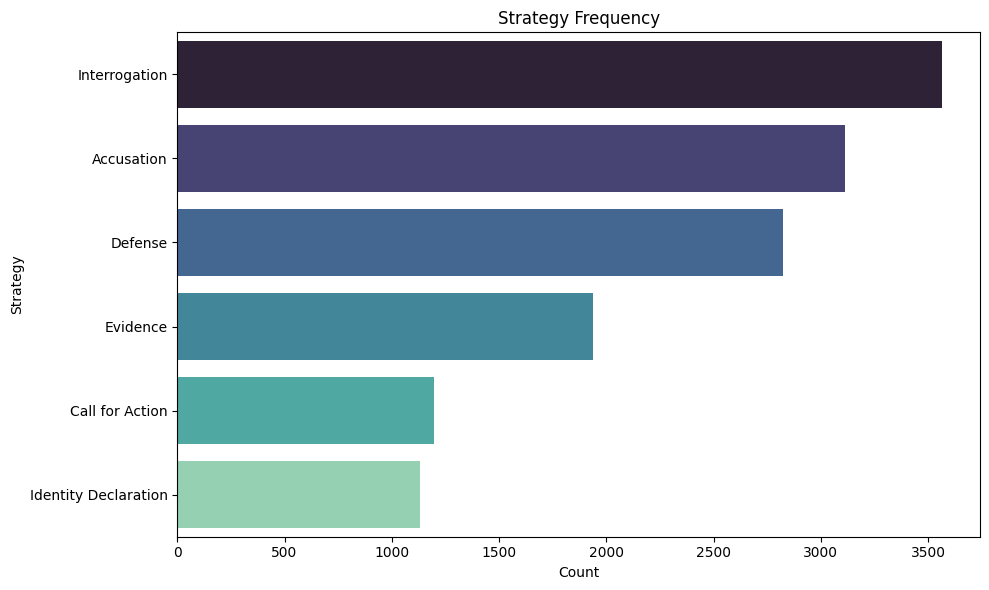

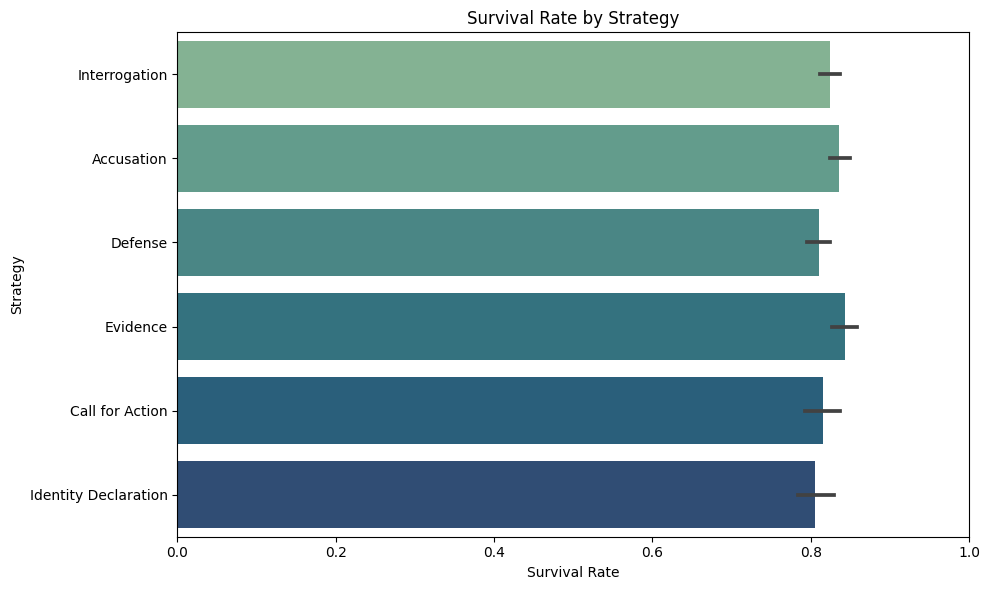

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ======================
# 1. Strategy Frequency
# ======================
strategic = exploded_df[exploded_df['annotation'] != "No Strategy"]

plt.figure(figsize=(10, 6))
sns.countplot(
    data=strategic,
    y="annotation",
    order=strategic['annotation'].value_counts().index,
    palette="mako"
)
plt.title("Strategy Frequency")
plt.xlabel("Count")
plt.ylabel("Strategy")
plt.tight_layout()
plt.show()


# ==========================
# 2. Survival by Strategy
# ==========================
survival_by_strategy = strategic[strategic['survived'].notnull()]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=survival_by_strategy,
    x="survived",
    y="annotation",
    estimator=lambda x: sum(x) / len(x),
    order=survival_by_strategy['annotation'].value_counts().index,
    palette="crest"
)
plt.title("Survival Rate by Strategy")
plt.xlabel("Survival Rate")
plt.ylabel("Strategy")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

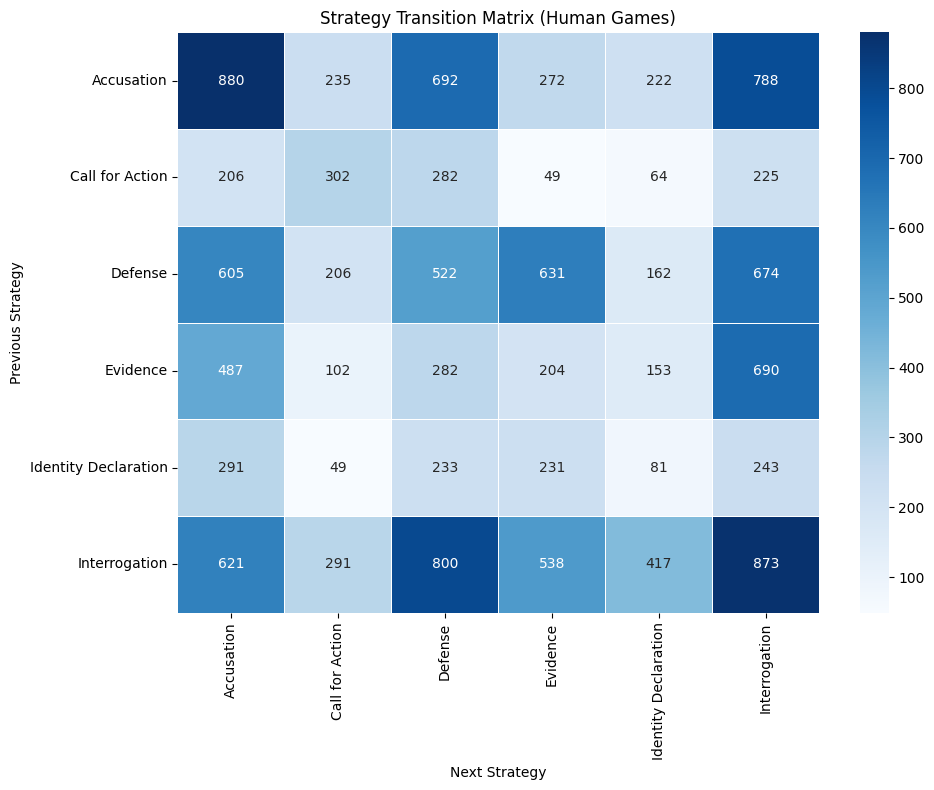

In [162]:
# Filter for non-null and non-"No Strategy" annotations
df_filtered = exploded_df[exploded_df['annotation'].notnull() & (exploded_df['annotation'] != 'No Strategy')].copy()

# Sort to preserve conversation order
df_filtered = df_filtered.sort_values(by=["Game_ID", "Rec_Id"])

# Create annotation transition pairs within each game
from itertools import tee

transitions = []
for _, group in df_filtered.groupby("Game_ID"):
    annotations = group["annotation"].tolist()
    a, b = tee(annotations)
    next(b, None)
    transitions += list(zip(a, b))

# Build transition DataFrame and count transitions
trans_df = pd.DataFrame(transitions, columns=["from", "to"])
transition_matrix = trans_df.value_counts().unstack(fill_value=0)

# Plot the transition matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Strategy Transition Matrix (Human Games)")
plt.xlabel("Next Strategy")
plt.ylabel("Previous Strategy")
plt.tight_layout()
plt.show()


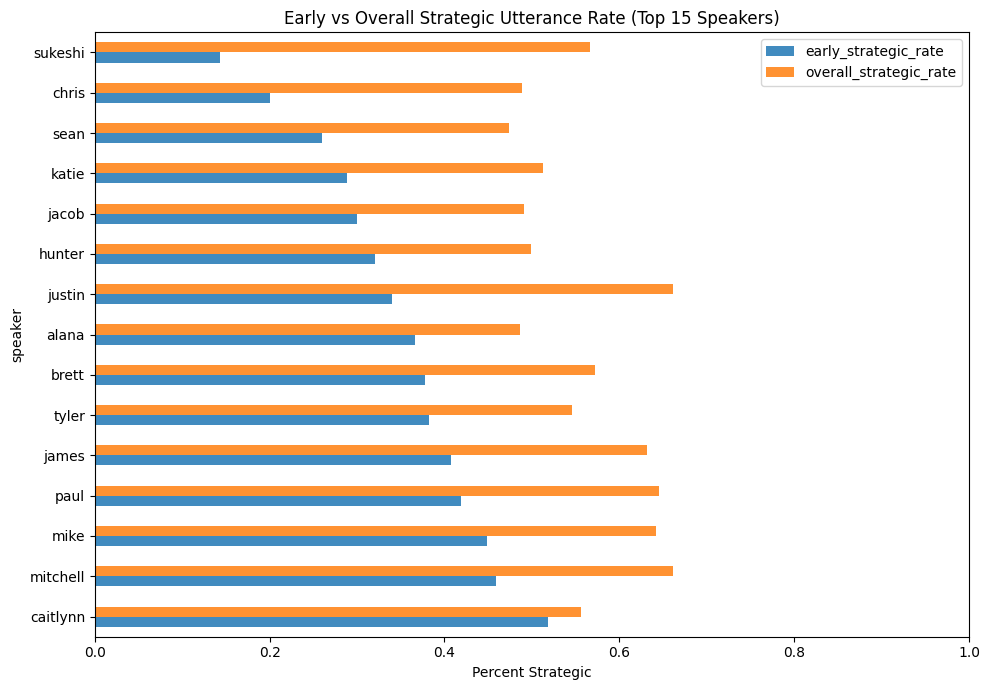

In [163]:
# Re-rank utterances per speaker per game
exploded_df["utterance_rank"] = exploded_df.groupby(["Game_ID", "speaker"])["Rec_Id"].rank(method="first")

# Flag strategic utterances
exploded_df["is_strategic"] = exploded_df["annotation"] != "No Strategy"

# Filter to first 5 utterances per speaker per game
early_df = exploded_df[exploded_df["utterance_rank"] <= 5]

# Compute early strategic rate per speaker
early_strat_rate = (
    early_df.groupby("speaker")["is_strategic"]
    .mean()
    .to_frame("early_strategic_rate")
)

# Compute overall strategic rate per speaker
overall_rate = (
    exploded_df.groupby("speaker")["is_strategic"]
    .mean()
    .to_frame("overall_strategic_rate")
)

# Combine both metrics and filter for top 15 speakers by total utterances
speaker_counts = exploded_df["speaker"].value_counts().head(15).index
strategy_timing_df = early_strat_rate.join(overall_rate).loc[speaker_counts]

# Plot the updated bar chart
strategy_timing_df = strategy_timing_df.sort_values("early_strategic_rate", ascending=False)
strategy_timing_df[["early_strategic_rate", "overall_strategic_rate"]].plot.barh(
    figsize=(10, 7), alpha=0.85
)
plt.title("Early vs Overall Strategic Utterance Rate (Top 15 Speakers)")
plt.xlabel("Percent Strategic")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


/Users/bjonnalagadda/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bjonnalagadda/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


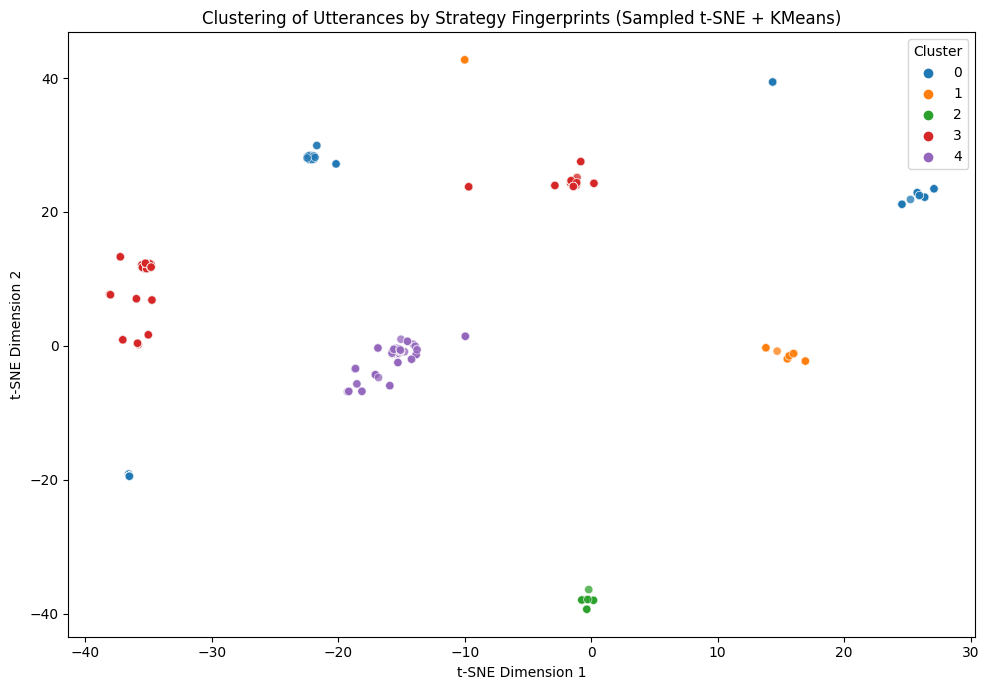

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt




# Sample the data first to speed up t-SNE
sampled = (
    exploded_df[exploded_df['annotation'] != "No Strategy"]
    .groupby(["Game_ID", "Rec_Id", "utterance"])["annotation"]
    .apply(lambda ann: " ".join(sorted(set(ann))))
    .reset_index()
    .sample(2000, random_state=42)
)

# Vectorize strategy fingerprints using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sampled["annotation"])

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
sampled["cluster"] = kmeans.fit_predict(X)

# t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X.toarray())

sampled["tsne_1"] = X_tsne[:, 0]
sampled["tsne_2"] = X_tsne[:, 1]

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=sampled,
    x="tsne_1", y="tsne_2",
    hue="cluster", palette="tab10", alpha=0.75
)
plt.title("Clustering of Utterances by Strategy Fingerprints (Sampled t-SNE + KMeans)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


We wanted to see how people mix different persuasion strategies in the game, like accusing someone, asking questions, or defending themselves. Each line of dialogue can use one or more of these strategies. We turned each line into a kind of "fingerprint" based on which strategies it used. Then we used a technique called t-SNE to group similar fingerprints together and plot them. The result is a scatterplot where each dot is a line from the game, and dots that are close together use similar mixes of strategies.

What we saw is that the dots form clear clusters. That means people tend to use certain combinations of strategies together, not just random mixes. This gives us a strong baseline to compare against LLM-generated dialogue. If AI models are really imitating people, their dialogue should fall into similar clusters. If it doesn't, that tells us the models are missing some of the patterns real players use when trying to persuade others.

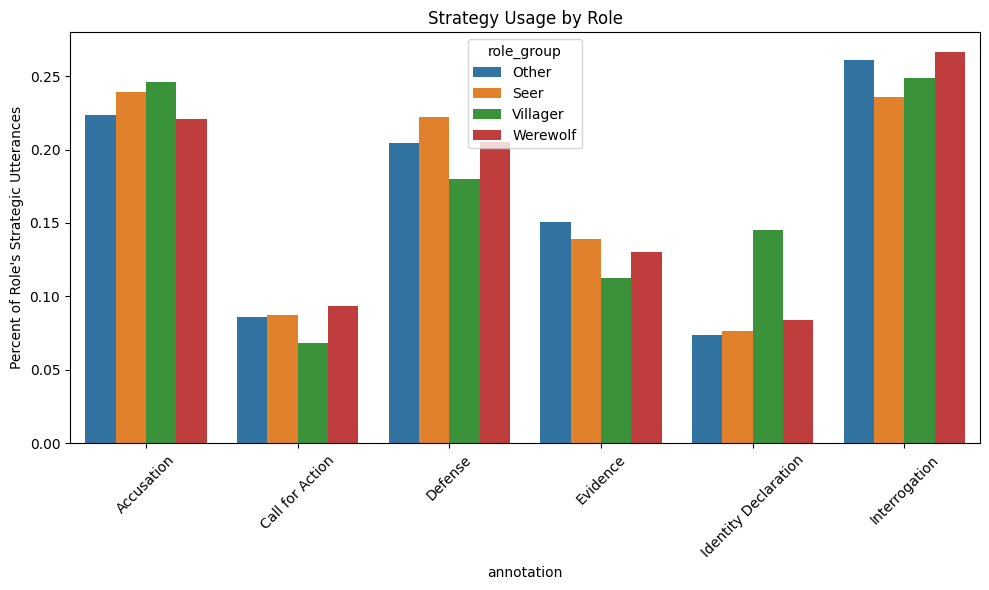

In [165]:
# Reload exploded_df in case of reset
exploded_df = pd.read_csv(out_path + "/exploded_df.csv")

# === Role-Aware Strategy Use ===

# Clean role labels
exploded_df["role_group"] = exploded_df["end_role"].fillna("Unknown").apply(
    lambda x: "Werewolf" if "Werewolf" in x else (
        "Seer" if "Seer" in x else (
            "Villager" if "Villager" in x else "Other"
        )
    )
)

# Filter to strategic utterances only
role_df = exploded_df[exploded_df["annotation"] != "No Strategy"]

# Count strategy usage by role
role_strat_counts = role_df.groupby(["role_group", "annotation"]).size().reset_index(name="count")

# Normalize by role total
role_totals = role_strat_counts.groupby("role_group")["count"].sum().reset_index(name="total")
role_strat_counts = role_strat_counts.merge(role_totals, on="role_group")
role_strat_counts["percent"] = role_strat_counts["count"] / role_strat_counts["total"]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=role_strat_counts,
    x="annotation", y="percent", hue="role_group"
)
plt.title("Strategy Usage by Role")
plt.ylabel("Percent of Role's Strategic Utterances")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Users/bjonnalagadda/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bjonnalagadda/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


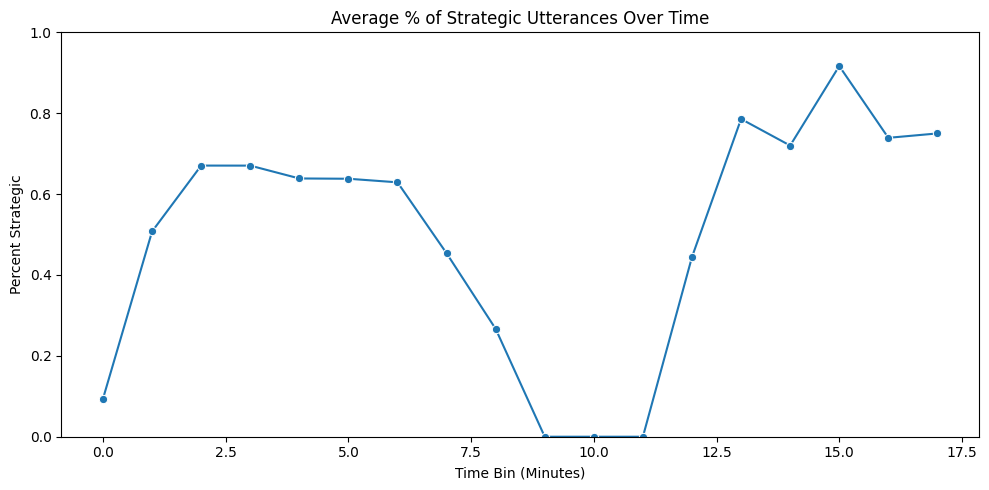

In [166]:
# Reload and prep data again in case of reset
exploded_df = pd.read_csv(out_path + "/exploded_df.csv")

# Convert timestamp to minutes (assuming MM:SS format)
def timestamp_to_min(ts):
    try:
        minutes, seconds = map(int, str(ts).split(":"))
        return minutes + seconds / 60
    except:
        return None

exploded_df["time_min"] = exploded_df["timestamp"].apply(timestamp_to_min)

# Keep only utterances with timing and strategic annotations
timing_df = exploded_df[exploded_df["annotation"].notnull() & exploded_df["time_min"].notnull()].copy()
timing_df["is_strategic"] = timing_df["annotation"] != "No Strategy"

# Bin into 1-minute intervals
timing_df["time_bin"] = timing_df["time_min"].apply(lambda x: int(x))

# Calculate % strategic per minute bin
grouped = (
    timing_df.groupby(["Game_ID", "time_bin"])["is_strategic"]
    .agg(["sum", "count"])
    .reset_index()
)
grouped["percent_strategic"] = grouped["sum"] / grouped["count"]

# Average across games
avg_over_time = grouped.groupby("time_bin")["percent_strategic"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_over_time, x="time_bin", y="percent_strategic", marker="o")
plt.title("Average % of Strategic Utterances Over Time")
plt.xlabel("Time Bin (Minutes)")
plt.ylabel("Percent Strategic")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


## Format data for comparison

Rename columns, etc so that it matches the same format as what's in Werewolf Arena; save output

In [196]:
outcome_df = outcome_df.rename(columns={"Game_ID": "game_id", "end_role": "role"})
outcome_df.to_csv(os.path.join(out_path, "allrounds.csv"))
outcome_df

,game_id,speaker,source,voted_for,role,votes_target,winner
0,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,jessica,Seer,jessica,Villagers
1,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kaelan,Ego4D,jessica,Center card,jessica,Villagers
2,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,jessica,Ego4D,None,Werewolf,jessica,Villagers
3,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,daniel,Ego4D,daniel,Werewolf,jessica,Villagers
4,game9 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,None,Troublemaker,None,Werewolves
...,...,...,...,...,...,...,...
739,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,justin,Youtube,eric,Werewolf,eric,Werewolves
740,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,eric,Youtube,mitchell,Tanner,eric,Werewolves
741,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,paul,Youtube,mitchell,Villager,eric,Werewolves
742,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,mitchell,Youtube,eric,Troublemaker,eric,Werewolves


In [195]:
merged_df = merged_df.rename(columns={"utterance": "text", "Game_ID": "game_id", "annotation": "strategy"})
merged_df["timestamp"] = merged_df["timestamp"].map(lambda t: sum(x * y for x, y in zip(map(int, t.split(':')), (60, 1))))
merged_df.to_csv(os.path.join(out_path, "alltext.csv"))
merged_df

,Rec_Id,speaker,timestamp,text,strategy,source,utterance_length,game_id,voted_for,end_role,votes_target,winner
0,1,kaelan,54,I don't know why this is necessary considering...,[No Strategy],Ego4D,11,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
1,3,kaelan,65,I am a Villager.,[Identity Declaration],Ego4D,4,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
2,8,kaelan,85,"Like, I mean-",[No Strategy],Ego4D,3,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
3,11,kaelan,101,"But, I-I-I-I-",[No Strategy],Ego4D,2,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
4,13,kaelan,0,"Continue. Well, I guess we don't really need t...",[No Strategy],Ego4D,11,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,None,Villager,None,Werewolves
...,...,...,...,...,...,...,...,...,...,...,...,...
21067,85,brad,279,We could.,[Defense],Youtube,2,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
21068,89,brad,283,Justin,[Accusation],Youtube,1,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
21069,100,brad,295,"It's just Justin, Justin, Justin.",[Accusation],Youtube,5,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
21070,102,brad,297,Just inception.,[No Strategy],Youtube,2,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
